## 1. Import the Necessary Packages

Before running the code, make sure you have all the required packages installed.

You can set up a virtual environment and install all dependencies using a `requirements.txt` file

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib as plt
import os
import sys
import warnings as wr
import seaborn as sns
wr.filterwarnings('ignore')

## 2. EDA & Understanding our data

In this section, we will perform **Exploratory Data Analysis (EDA)** to:

- Get a sense of the dataset structure
- Identify missing values, data types, and anomalies
- Explore feature distributions and relationships
- Understand class balance and potential data quality issues

In [5]:
test_df = pd.read_csv("../data/SBAcase.11.13.17.csv")
test_df.head(20)

,Selected,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
0,0,1004285007,SIMPLEX OFFICE SOLUTIONS,ANAHEIM,CA,92801,CALIFORNIA BANK & TRUST,CA,532420,15074,...,0,30000,15000,0,0,0.50,0,1080,16175.0,0
1,1,1004535010,DREAM HOME REALTY,TORRANCE,CA,90505,CALIFORNIA BANK & TRUST,CA,531210,15130,...,0,30000,15000,0,0,0.50,1,1680,17658.0,0
2,0,1005005006,"Winset, Inc. dba Bankers Hill",SAN DIEGO,CA,92103,CALIFORNIA BANK & TRUST,CA,531210,15188,...,0,30000,15000,0,0,0.50,0,1080,16298.0,0
3,1,1005535001,Shiva Management,SAN DIEGO,CA,92108,CALIFORNIA BANK & TRUST,CA,531312,15719,...,0,50000,25000,0,0,0.50,0,1080,16816.0,0
4,1,1005996006,"GOLD CROWN HOME LOANS, INC",LOS ANGELES,CA,91345,SBA - EDF ENFORCEMENT ACTION,CO,531390,16840,...,0,343000,343000,0,1,1.00,0,7200,24103.0,0
5,1,1006295003,Ronald Lee Roberts,SACRAMENTO,CA,95831,CALIFORNIA BANK & TRUST,CA,531210,15813,...,0,50000,25000,0,0,0.50,0,2520,18345.0,0
6,0,1015066002,SUPERIOR BROKERS REALTY,HUNTINGTON PARK,CA,90255,U.S. BANK NATIONAL ASSOCIATION,OH,531210,16841,...,247074,297500,223125,0,1,0.75,0,8070,24930.0,1
7,0,1015266003,LIBERTY REALTY CO,LONG BEACH,CA,90808,JPMORGAN CHASE BANK NATL ASSOC,NV,531210,16841,...,0,30000,15000,1,0,0.50,0,2520,19380.0,0
8,0,1018975003,"SOUTHLAND MGT., CO.",SANTA ANA,CA,92704,BANK OF AMERICA NATL ASSOC,NC,531390,16252,...,35333,50000,25000,0,0,0.50,0,660,16943.0,1
9,1,1022515008,"AMR Appraisals, Inc.",SAN RAMON,CA,94583,BANK OF AMERICA NATL ASSOC,NC,531320,16264,...,0,10000,5000,1,0,0.50,0,2520,18834.0,0


### 2.1 Columns Descriptions

Based on the original dataset and available sources, we have the following understanding of each column:<br>
(For more information on the dataset refer to the `README.md` file)

| Variable Name        | Description                                                                 |
|----------------------|-----------------------------------------------------------------------------|
| `LoanNr_ChkDgt`      | Identifier – Primary key                                                    |
| `Name`               | Borrower name                                                               |
| `City`               | Borrower city                                                               |
| `State`              | Borrower state                                                              |
| `Zip`                | Borrower ZIP code                                                           |
| `Bank`               | Bank name                                                                   |
| `BankState`          | Bank state                                                                  |
| `NAICS`              | North American Industry Classification System code                          |
| `ApprovalDate`       | Date SBA commitment was issued                                              |
| `ApprovalFY`         | Fiscal year of loan commitment                                              |
| `Term`               | Loan term in months                                                         |
| `NoEmp`              | Number of business employees                                                |
| `NewExist`           | Business type: 1 = Existing, 2 = New                                        |
| `CreateJob`          | Number of jobs created                                                      |
| `RetainedJob`        | Number of jobs retained                                                     |
| `FranchiseCode`      | Franchise code (`00000` or `00001` = No franchise)                          |
| `UrbanRural`         | 1 = Urban, 2 = Rural, 0 = Undefined                                          |
| `RevLineCr`          | Revolving line of credit (Y = Yes, N = No)                                  |
| `LowDoc`             | LowDoc Loan Program participation (Y = Yes, N = No)                         |
| `ChgOffDate`         | Date when the loan was charged off (if defaulted)                           |
| `DisbursementDate`   | Date when the loan funds were disbursed                                     |
| `DisbursementGross`  | Amount disbursed to the borrower                                            |
| `BalanceGross`       | Gross amount outstanding                                                    |
| `MIS_Status`         | Loan status: CHGOFF (Charged off) or PIF (Paid in full)                     |
| `ChgOffPrinGr`       | Amount of principal charged off                                             |
| `GrAppv`             | Gross amount of loan approved by the bank                                   |
| `SBA_Appv`           | Portion of the loan guaranteed by the SBA                                   |
| `New`                | 1 if NewExist = 2 (New business), 0 if NewExist = 1 (Existing business)     |
| `Portion`            | Proportion of the loan guaranteed by the SBA                                |
| `RealEstate`         | 1 if the loan is backed by real estate, 0 otherwise                         |
| `Recession`          | 1 if the loan was active during the Great Recession, 0 otherwise            |
| `Selected`           | 1 if selected for training, 0 if selected for testing (assignment split)    |
| `Default`            | 1 if the loan was charged off (defaulted), 0 if paid in full                |
| `daysterm`           | Loan term in days (used in recession-related calculations)                  |
| `xx`                 | Extra variable created for recession feature generation                     |

### 2.2 Data Types and Missing Values

In [6]:
print(f"Shape of the dataset: {test_df.shape} \nDataset information:")
print(test_df.info())

Shape of the dataset: (2102, 35) 
Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102 entries, 0 to 2101
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Selected           2102 non-null   int64  
 1   LoanNr_ChkDgt      2102 non-null   int64  
 2   Name               2102 non-null   object 
 3   City               2102 non-null   object 
 4   State              2102 non-null   object 
 5   Zip                2102 non-null   int64  
 6   Bank               2099 non-null   object 
 7   BankState          2099 non-null   object 
 8   NAICS              2102 non-null   int64  
 9   ApprovalDate       2102 non-null   int64  
 10  ApprovalFY         2102 non-null   int64  
 11  Term               2102 non-null   int64  
 12  NoEmp              2102 non-null   int64  
 13  NewExist           2101 non-null   float64
 14  CreateJob          2102 non-null   int64  
 15  RetainedJob      

Most of the data types are either `float64` or `int64`, but there are 8 that are `object` types with which we probably have to deal with in order to do a precise selecting of model building variables.<br>
The usual tendency is that a column has 0 null values, which shows good data consistency, but what stands out from the rest is the **ChgOffDate** column that has 697 non-null values out of the 2102. <br>
Upon closer inspection and previous dataset knowledge, we know that this column only has information if the loan was defaulted and it was written off in the books of the loaner. Nonetheless, we will have to deal with this inconsistency.



### 2.3 Dataset Description
In order to observe any patterns and tendencies in the data, we need to generate a basic **descriptive summary** of the dataset.

In [7]:
test_df.describe()

,Selected,LoanNr_ChkDgt,Zip,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,...,ChgOffPrinGr,GrAppv,SBA_Appv,New,RealEstate,Portion,Recession,daysterm,xx,Default
count,2102.000000,2.102000e+03,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2101.000000,2102.000000,...,2.102000e+03,2.102000e+03,2.102000e+03,2102.000000,2102.000000,2102.000000,2102.000000,2102.000000,2099.000000,2102.000000
mean,0.500000,4.469172e+09,92698.612274,531630.902950,16179.587060,2004.035680,126.980495,10.150809,1.153736,2.549952,...,2.002908e+04,2.330641e+05,1.891759e+05,0.154139,0.274500,0.671055,0.068506,3809.414843,20076.896141,0.326356
std,0.500119,2.530069e+09,1878.208435,521.836986,1454.931276,4.006321,93.798944,34.402420,0.362099,8.010175,...,7.543229e+04,3.436310e+05,2.989268e+05,0.361168,0.446368,0.186519,0.252673,2813.968318,2854.510377,0.468991
min,0.000000,1.004285e+09,65757.000000,531110.000000,10554.000000,1989.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,4.500000e+03,2.250000e+03,0.000000,0.000000,0.296770,0.000000,0.000000,11524.000000,0.000000
25%,0.000000,2.392978e+09,91402.000000,531210.000000,15695.750000,2003.000000,60.000000,2.000000,1.000000,0.000000,...,0.000000e+00,3.000000e+04,1.500000e+04,0.000000,0.000000,0.500000,0.000000,1800.000000,18316.500000,0.000000
50%,0.500000,3.621730e+09,92559.500000,531312.000000,16556.000000,2005.000000,84.000000,3.000000,1.000000,0.000000,...,0.000000e+00,6.100000e+04,4.168000e+04,0.000000,0.000000,0.500000,0.000000,2520.000000,19270.000000,0.000000
75%,1.000000,6.551607e+09,94127.750000,532230.000000,17149.750000,2007.000000,240.000000,8.000000,1.000000,2.000000,...,1.507350e+04,3.000000e+05,2.397562e+05,0.000000,1.000000,0.850000,0.000000,7200.000000,22335.000000,1.000000
max,1.000000,9.958873e+09,96161.000000,533110.000000,18911.000000,2012.000000,306.000000,650.000000,2.000000,130.000000,...,1.509550e+06,2.350000e+06,2.115000e+06,1.000000,1.000000,1.000000,1.000000,9180.000000,27598.000000,1.000000


In [8]:
test_df.median(numeric_only=True)

Selected             5.000000e-01
LoanNr_ChkDgt        3.621730e+09
Zip                  9.255950e+04
NAICS                5.313120e+05
ApprovalDate         1.655600e+04
ApprovalFY           2.005000e+03
Term                 8.400000e+01
NoEmp                3.000000e+00
NewExist             1.000000e+00
CreateJob            0.000000e+00
RetainedJob          2.000000e+00
FranchiseCode        1.000000e+00
UrbanRural           1.000000e+00
ChgOffDate           1.830200e+04
DisbursementDate     1.664800e+04
DisbursementGross    1.000000e+05
BalanceGross         0.000000e+00
ChgOffPrinGr         0.000000e+00
GrAppv               6.100000e+04
SBA_Appv             4.168000e+04
New                  0.000000e+00
RealEstate           0.000000e+00
Portion              5.000000e-01
Recession            0.000000e+00
daysterm             2.520000e+03
xx                   1.927000e+04
Default              0.000000e+00
dtype: float64

### 2.4 Visualization 

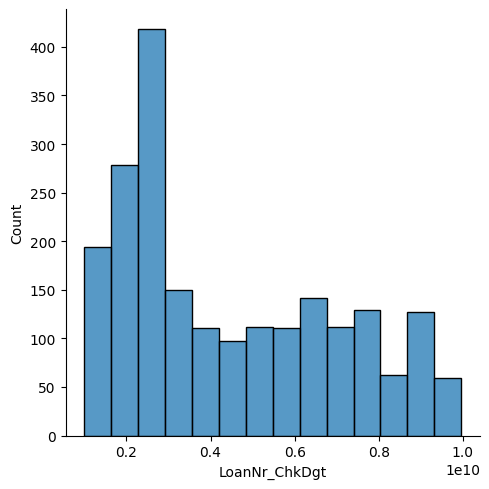

In [9]:
sns.displot(test_df, x='LoanNr_ChkDgt')

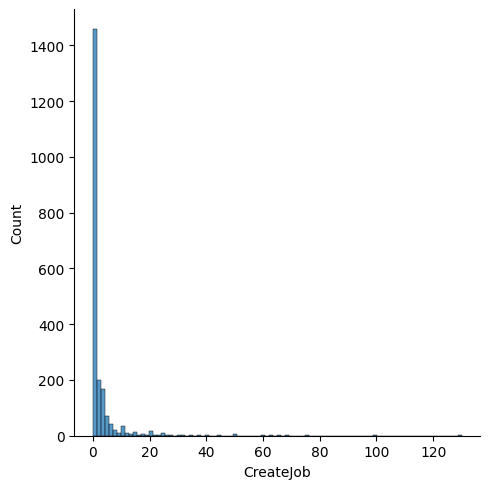

In [11]:
sns.displot(test_df, x='CreateJob')